# TDA233 / DIT382 Machine Learning: Homework 1 <br />
**Goal:** Start working with Jupyter notebooks, introduction to probability and regression models <br />
**Grader:** Jack Sandberg <br />
**Submitted by:** Anna Davoodi, 000808-5763, annadav@student.chalmers.se; Nils Ledin, Personal no., email <br />

# Read this before starting


## General guidelines
* Answer all fields marked with 📝 (and `# TODO` in the code blocks). This includes
    * your name, personal number and email address above, and
    * all later fields marked with "📝 Your answer here:".
* Feel free to add more cells if needed.
* All solutions to theoretical and pratical problems must be submitted in this notebook, and equations wherever required, should be formatted using LaTeX math-mode.
    * Do NOT hand in an assignment that isn't runnable!
* All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. 
All plots/results should be visible such that the notebook does not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
* All tables and other additional information should be included in this notebook.
* **Before submitting, make sure that your code can run on another computer, i.e. that all plots can show on another computer including all your text and equations. It is good to check if your code can run here: https://colab.research.google.com**
* **Submit your solutions as a notebook file (`.ipynb`) and in HTML format (`.html`). To export this notebook to HTML format click `File` $\rightarrow$ `Download as` $\rightarrow$ `HTML`.**

**Jupyter/IPython Notebook** is a collaborative Python web-based environment. This will be used in all our Homework Assignments. It is installed in the halls ES61-ES62, E-studio and MT9. You can also use google-colab: https://colab.research.google.com
to run these notebooks without having to download, install, or do anything on your own computer other than a browser.
Some useful resources:
1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ (Quick-start guide)
2. https://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html
3. http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html (markdown)

## Required software

For the practical problem in this assignment you will need to install the following Python packages:

- `numpy`: The fundamental package for scientific computing with Python (so fundamental there is a [Nature review](https://www.nature.com/articles/s41586-020-2649-2) on it)
- `matplotlib`: Visualization with Python
- `sklearn`: Scikit-learn is a package for performing machine learning in Python.

> **Note:** In Google Colab you can install packages using   `!pip  install <package_name>`

> **Note:** In Google Colab these packages should be preinstalled but it is a good habit to check if all required packages are installed beforehand and the installed versions of packages. Use `!pip list` to list packages installed by pip on Google Colab.

> **Note:** We recommend that you install these packages in a [virtual environment](https://docs.python.org/3/library/venv.html) if you are running this on your own computer.

# Part 1: Theoretical problems

## Problem 1: Bayes Rule [3 points]

After your yearly checkup, the doctor has bad news and good news. The
bad news is that you tested positive for a very serious cancer and
that the test is 99.5% accurate i.e. the probability of testing
positive given you have the disease is 0.995. The probability of
testing negative if you don’t have the disease is the same (also 0.995). The good news is that it is a rare condition affecting only 1 in 500 people. **What is the probability you actually have the disease?** 

After doing all your calculations you realize that there was a misprint on the test, and the accuracy was actually only 95% (for both testing postive given that you have the disease and for testing negative given that you do not have the disease). **How will this change your probability of having the disease?**

Show all calculations and the final result. Remember to use LaTeX math-mode to format mathematical expressions and equations.


### Probability of disease
Let $C = $ cancer, $P =$ positive test. Thus $\neg P = $ negative test, and $\neg C =$ no cancer. We are given the following probabilities: 

$$
\pi(P|C)= 0.995, \:\: \pi(N | \neg C) = 0.995, \:\: \pi(C)=\frac{1}{500}.
$$

Our goal is to find $\pi(C|P)$. From Bayes Theorem we obtain the following:

$$
\pi(C|P) = \pi(C) \cdot \frac{\pi(P|C)}{\pi(P)}.
$$

$\pi(P)$ is calculated using the total law of probability as well as the complementary events:

$$
\pi(P) = \pi(P|C)\cdot\pi(C) + \pi(P|\neg C)\cdot \pi(\neg C) = \pi(P|C)\cdot\pi(C) + (1-\pi(\neg P |\neg C))\cdot (1-\pi(C))=\\\
= 0.995\cdot\frac{1}{500}+0.005\cdot\frac{499}{500}=\frac{0.995+499\cdot0.005}{500}.
$$

In total we obtain

$$
\pi(C|P) = \frac{1}{500}\cdot0.995\cdot\frac{500}{0.995+499\cdot0.005}\approx 0.285,
$$
meaning the probability of having cancer given the positive test is approximately $28.5$%.

### Changes from adjusted probability for the test

If $\pi(P|C)=\pi(\neg P | \neg C) = 0.95$, we have $\pi(P|\neg C) = 1-0.95=0.05$. Thus

$$
\pi(C|P) = \frac{1}{500}\cdot 0.95 \cdot \frac{500}{0.95+499\cdot0.05}\approx0.04.
$$

Thus, the probability of having cancer given a positive test is now down to approximately $4$%.

## Problem 2: Setting hyperparameters [2 points]

Suppose $\theta$ is a random variable generated from a beta distribution as: $\theta \sim \text{Beta}(a^2,b)$. Also assume that  the expectation of $\theta$ is $m$: $E[\theta] = m$
and the variance of $\theta$ is $v$: $\text{Var}(\theta) = v$. Express $a$ and $b$ in terms of (only) $m$ and $v$.
For more information about the $\text{Beta}$ distribution see https://en.wikipedia.org/wiki/Beta_distribution.

The expectation and variance for a random variable $\theta \sim Beta(\alpha,\beta)$ with general parameters $\alpha,\:\beta$ are as follows

$$
E[\theta]=\frac{\alpha}{\alpha + \beta}, \:\: Var[\theta]=\frac{\alpha \beta}{(\alpha+\beta)^2 (\alpha+\beta+1)}.
$$

In our case, $\alpha = a^2$ and $\beta = b$. With the given information we then have

$$
\frac{a^2}{a^2 + b}=m \Rightarrow b = a^2(\frac{1}{m}-1) \:\: (\text{note: } a^2+b=\frac{a^2}{m}),
$$

$$
\frac{a^2 b}{(a^2+b)^2 (a^2 + b + 1)} = v \Rightarrow \frac{a^2 \cdot a^2 (\frac{1}{m}-1)}{\big(\frac{a^2}{m}\big)^2 \big(a^2+a^2(\frac{1}{m}-1)+1\big)}=...=\frac{m^2+m}{\frac{a^2}{m}+1}=v \Rightarrow a^2 = \frac{m^2+m^3}{v}-m. 
$$

*fråga, skriva ut a eller räcker det med a^2? motivation kring tecken? a kan både vara positiv och negativ, right?*

Using this information about $a^2$ we then obtain $b=\frac{m^2+m^2-mv}{v}\cdot(\frac{1}{m}-1)=\frac{(1-m)(m+m^2-v)}{v}$.

## Problem 3: Correlation and Independence [2 points]

Let $X$ be a continuous random variable, uniformly distributed in $[-2, +2]$ and let $Y := X^4$. Clearly $Y$ is not independent of $X$ -- in fact it is uniquely determined by $X$. However, show that the covariance of $X$ and $Y$ is 0: $\text{cov}(X, Y ) = 0$.
Show and justify every step of the proof. Statements like "it is obvious that, it is trivial ..." will not be accepted.

The covariance between two random variables $X,Y$ is given by $Cov(X,Y) = E[[X-E[X]][Y-E[Y]]]$. Using properties for expected values such as linearity, as well as the given information that $Y=X^4$ we obtain

$$
Cov(X,Y) = E[[X-E[X]][Y-E[Y]]] = E[XY-YE[X]-XE[Y]+E[X]E[Y]]= \\\ 
=E[XY]-E[YE[X]]-E[XE[Y]]+E[E[X]E[Y]]= \\\
= E[X^5]-E[X^4E[X]]-E[XE[X^4]]+E[E[X]E[X^4]].
$$

From the definition of expected value for a continuous random variable we obtain that

$$
E[X]=\int_{-2}^2 \frac{x}{2-(-2)} dx = 0 \text{ since we are integrating an odd function over a symmetrical domain}, \\\
E[X^4] = \int_{-2}^2 \frac{x^4}{2-(-2)} dx = \frac{1}{4}\frac{x^5}{5}\Big|_{-2}^2= \frac{16}{5}, \\\
E[X^5] = \int_{-2}^2 \frac{x^5}{2-(-2)} dx = 0 \text{ for the same reason as above}.
$$

Thus 

$$
Cov(X,Y) = 0-E[X^4\cdot 0] - E[X\cdot \frac{16}{5}]+E[0]= -\frac{16}{5}E[X] = 0,
$$

with the second to last equality stemming from linearity.

## Problem 4: Spherical Gaussian estimation [4 points]

Consider a dataset $X$ consisting of i.i.d. observations
generated from a spherical Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p $ identity matrix, and $\sigma^2$ is a scalar.

Write the mathematical expression for the Maximum Likelihood Estimator (MLE) for $\mu$ and $\sigma$ in above setup.

For more information about the spherical Gaussian distribution, see https://en.wikipedia.org/wiki/Multivariate_normal_distribution.
For more information about the identity matrix see: https://en.wikipedia.org/wiki/Identity_matrix

Considering a set of $n$ i.i.d samples $X_i\sim N(\mu,\sigma^2,I)$ ($i=1,\dots,n$), the MLE for $\mu$ and $\sigma^2$ is defined as

$$
\hat{\mu}=\text{argmax}_{\mu} \hat{\ell},\\
\hat{\sigma}=\text{argmax}_{\sigma^2} \hat{\ell}.
$$

Here, $\hat{\ell}$ called the likehood is defined as

$$
\hat{\ell}(\mu,\sigma^2,I;X)=\prod_{i=1}^n f(X_i;\mu,\sigma^2,I),
$$

where $f(X_i;\mu,\sigma^2,I)$ is the probability density function, which for the multivariate normal distribution is given by

$$
f(X_i;\mu,\sigma^2,I) = (2\pi)^{-\frac{p}{2}}\text{det}(\sigma^2 I)^{-\frac{1}{2}}\text{exp}\Big(-\frac{1}{2}(X_i-\mu)^T(\sigma^2 I)^{-1}(X_i-\mu)\Big),
$$
with det($A$) representing the determinant of matrix $A$ and exp($a$) representing $e^a$. In terms of the likelihood we obtain

$$
\hat{\ell}(\mu,\sigma^2,I;X) = \prod_{i=1}^n (2\pi)^{-\frac{p}{2}}\text{det}(\sigma^2 I)^{-\frac{1}{2}}\text{exp}\Big(-\frac{1}{2}(X_i-\mu)^T(\sigma^2 I)^{-1}(X_i-\mu)\Big)= \\\
=(2\pi)^{-\frac{np}{2}}\text{det}(\sigma^2 I)^{-\frac{n}{2}}\text{exp}\Big(-\frac{1}{2}\sum_{i=1}^n (X_i-\mu)^T(\sigma^2 I)^{-1}(X_i-\mu)\Big).
$$

What is left is to calculate what $\hat{\mu}=\text{argmax}_{\mu} \hat{\ell}$ and $\hat{\sigma^2}=\text{argmax}_{\sigma^2} \hat{\ell}$ are. This is done by, similarly to the exercises below (Part 2, Problem 5bc), taking the partial derivative of $\hat{\ell}$ with respect to $\mu$ or $\sigma^2$, depending on which MLE we are calculating. Since the normal distribution per construction is always concave, we know that setting the expression of the partial derivative to 0 will let us obtain which $\mu$ or $\sigma^2$ value will achive this (i.e the argmax for each parameter, respectively). 

To calculate the partial derivatives we first find $\text{log}(\hat{\ell})$, to simplify the derivation. Note that the logarithm of the likelihood will perserve the location of the maximum, thus it is allowed to be used in this context:

$$
\text{log}(\hat{\ell}) = -\frac{np}{2}\text{log}(2\pi)-\frac{n}{2}\text{log}(\text{det}(\sigma^2 I))-\frac{1}{2}\sum_{i=1}^n (X_i - \mu)^2 (\sigma^2 I)^{-1}(X_i-\mu).
$$

Firstly, note that $\text{det}(\sigma^2 I)=(\sigma^2)^p$ and so $\text{log}(\text{det}(\sigma^2 I))= p\text{log}(\sigma^2)$. Secondly, the inverse of the identity matrix is itself. Since $\sigma^2$ is a scalar we can reformulate 

$$
(X_i - \mu)^2 (\sigma^2 I)^{-1}(X_i-\mu)= \frac{1}{\sigma^2}(X_i - \mu)^2(X_i-\mu) = \frac{1}{\sigma^2}({X_i}^T{X_i} - {X_i}^T\mu-\mu^T X_i + \mu^T\mu) = \frac{1}{\sigma^2} ({X_i}^T{X_i} - 2{X_i}^T\mu + \mu^T\mu).
$$

The two last equalities stemming from calculations analogous of those Part 2, Problem 5b and 5c. With these reformulations, we take the partial derivative with respect to $\mu$ 

$$
\frac{\partial \text{log}(\hat{\ell})}{\partial \mu} = 0+0-\frac{1}{2\sigma^2}\sum_{i=1}^n(0-2X_i+2\mu) = \frac{1}{\sigma^2}\sum_{i=1}^n(X_i-\mu).
$$

Solving for the maximum by setting this partial derivative to 0 yeilds

$$
 \frac{1}{\sigma^2}\sum_{i=1}^n(X_i-\mu) = 0 \Rightarrow \sum_{i=1}^n(X_i-\mu) = 0 \Rightarrow \mu n = \sum_{i=1}^n X_i \Rightarrow \mu = \hat{\mu}= \frac{1}{n}\sum_{i=1}^n X_i.
$$

Similarly, for $\sigma^2$, we obtain the partial derivative as

$$
\frac{\partial \text{log}(\hat{\ell})}{\partial \sigma^2} = 0 - \frac{np}{2\sigma^2}+\frac{1}{2\sigma^4}\sum_{i=1}^n ({X_i}^T{X_i} - 2{X_i}^T\mu + \mu^T\mu).
$$

Setting this to 0 and solving for $\sigma^2$ yeilds

$$
\frac{np}{2\sigma^2}=\frac{1}{2\sigma^4}\sum_{i=1}^n ({X_i}^T{X_i} - 2{X_i}^T\mu + \mu^T\mu) \Rightarrow np\sigma^2 = \sum_{i=1}^n ({X_i}^T{X_i} - 2{X_i}^T\mu + \mu^T\mu) \Rightarrow \sigma^2 = \hat{\sigma^2} = \sum_{i=1}^n ({X_i}^T{X_i} - 2{X_i}^T\mu + \mu^T\mu).
$$

# Part 2: Practical problems

## Problem 5: Linear Regression with regularization [9 points]

You are newly recruited as a Data Scientist at a leading consultancy company in Gothenburg. Your first task at the job is to help the Swedish Public Health Agency (folkhälsomyndigheten) for predicting the diabetes progression of patients. Assume that you are given a dataset D of $n$ patients with $D = \{ (\mathbf{x}_i, y_i)\}_{i=1}^n$ where $\mathbf{x}_i \in \mathbb{R}^p$ represents numerical features of each patients and $y_i \in \mathbb{R}$ represent the numerical diabetes progression.  One can also view the dataset D as a pair of matrices $(\mathbf{X}, \mathbf{y})$ with $\mathbf{X} \in \mathbb{R}^{n \times p}$ and $\mathbf{y} \in \mathbb{R}^{n \times 1}$.

Fresh with the lectures in the machine learning course at Chalmers, you would like to use a linear model to quickly perform the task. In order words, you would like to find a vector $\mathbf{w} \in \mathbb{R}^{p \times 1}$  such that $\mathbf{y} = \mathbf{X} \mathbf{w}$.  However,  you have just read one of the most popular machine learning books and it argues that standard linear regression (for finding $\mathbf{w}$) can lead to various problems such as non-uniqueness of the solution,  overfitting, etc. As a result, you decided to add a penalty term called regularization to control the optimisation problem. More specifically, you want to solve for: $\min_{\mathbf{w}}  \mathcal{L}(\mathbf{w})$ where  $\mathcal{L}(\mathbf{w}) = \left(\sum_{i=1}^n (y_i - \mathbf{w}^T\mathbf{x}_i)^2 \right) + \left(\alpha \sum_{j=1}^p w_j^2 \right) $ with $\alpha \in \mathbb{R}$ a small coefficient that you will decide later on.

Please note the slight changes in the notation. Recall that in the lectures we had a dataset $\{ (\mathbf{x}_n, t_n)\}_{n=1}^N$ where $\mathbf{x}_n \in \mathbb{R}^D$ and $t_n \in \mathbb{R}$. We also appended $1$ to the begining of $\mathbf{x}_n$ so both $\mathbf{x}_n$ and $\mathbf{w}$ were in $\mathbb{R}^{D+1}$. Thus, here $p$ is the same thing as $D+1$. Compare $w_1, w_2, \dots, w_p$ with $w_0, w_1, \dots, w_D$.

### a) Expression for loss function [1 point]
Write down $\mathcal{L}(\mathbf{w})$ in matrix/vector forms using only $\mathbf{X}$, $\mathbf{y}$ and $\mathbf{w}$ and the L2 norm. In other words, you are not allowed to use any components $y_i, \mathbf{w}_j$ or $\mathbf{x}_i$ ( For any vector $\mathbf{z}$ use the following notation $|\mathbf{z}|_2$ to mean the L2 norm of  $\mathbf{z}$ See http://mathworld.wolfram.com/L2-Norm.html for more information about the L2 norm.)

In matrix form, $\mathcal{L}(\mathbf{w})$ is given by

$$
\mathcal{L}(\mathbf{w})= |\mathbf{y}-\mathbf{Xw}|_2^2+\alpha|\mathbf{w}|_2^2.
$$

### b) Gradient of loss function [1 point] 
Derive and write down in matrix/vector forms the gradient of $\mathcal{L}(\mathbf{w})$ with respect to $\mathbf{w}$. Show all the derivations. (Hint: You can start by  computing the gradient of the full expression and then convert it to matrix/vector forms. You can also directly get the gradients from your answer in a))

We start by expanding the expression given above for $\mathcal{L}(\mathbf{w})$ as follows

$$
\mathcal{L}(\mathbf{w})= |\mathbf{y}-\mathbf{Xw}|_2^2+\alpha|\mathbf{w}|_2^2 = (\mathbf{y}-\mathbf{Xw})^T(\mathbf{y}-\mathbf{Xw})+\alpha \mathbf{w}^T \mathbf{w} = (\mathbf{y}^T-\mathbf{w}^T\mathbf{X}^T)(\mathbf{y}-\mathbf{Xw}) + \alpha \mathbf{w}^T \mathbf{w} = \\\
= \mathbf{y}^T\mathbf{y}-\mathbf{y}^T\mathbf{Xw}-\mathbf{w}^T\mathbf{X}^T\mathbf{y}+ \mathbf{w}^T\mathbf{X}^T\mathbf{Xw}+\alpha \mathbf{w}^T \mathbf{w}.
$$

The second term in the last expression can be reformulated as $\mathbf{y}^T\mathbf{Xw}=\mathbf{y}^T(\mathbf{w}^T\mathbf{X}^T)^T=(\mathbf{w}^T\mathbf{X}^T\mathbf{y})^T$. Since $\mathbf{w}^T\in\mathbb{R}^{1\times p},\:\mathbf{X}^T\in \mathbb{R}^{p\times n}$ and $\mathbf{y}\in \mathbb{R}^{n\times 1}$, then $\mathbf{w}^T\mathbf{X}^T\in\mathbb{R}^{1\times n}$ which means that $(\mathbf{w}^T\mathbf{X}^T)\mathbf{y}\in\mathbb{R}$. Ultimately, since this term is a scalar it follows that $(\mathbf{w}^T\mathbf{X}^T\mathbf{y})^T=\mathbf{w}^T\mathbf{X}^T\mathbf{y}=\mathbf{y}^T\mathbf{Xw}$. Thus,

$$
\mathcal{L}(\mathbf{w})=  \mathbf{y}^T\mathbf{y}-2\mathbf{y}^T\mathbf{Xw}+\mathbf{w}^T\mathbf{X}^T\mathbf{Xw}+\alpha \mathbf{w}^T \mathbf{w}.
$$

Using the rules for partial integration with respect to a vector we obtain

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}}=0-2\mathbf{y}^T \mathbf{X}+2\mathbf{X}^T\mathbf{Xw}+2\alpha \mathbf{w}=2\mathbf{X}^T\mathbf{Xw}-2\mathbf{y}^T \mathbf{X}+2\alpha \mathbf{w}.
$$


### c) Derive optimal solution [2 points]
Derive and write down in matrix/vector forms the solution $\mathbf{w}^*$ to the optimization problem $\min_{\mathbf{w}}  \mathcal{L}(\mathbf{w})$. Show all your derivations. (Hint: $\mathcal{L}(\mathbf{w})$ is convex in $\mathbf{w}$)

The optimum for $\text{min}_{\mathbf{w}}\mathcal{L}(\mathbf{w})$ is achieved by finding $\mathbf{w}^*$ such that $\frac{\partial \mathcal{L}}{\partial \mathbf{w}}=0$. Since $\mathcal{L}(\mathbf{w})$ is convex, if such an $\mathbf{w}^*$ exists then it will be the $\mathbf{w}$ which achieves the minimum.

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}}=0 \Rightarrow 2\mathbf{X}^T\mathbf{Xw}-2\mathbf{y}^T \mathbf{X}+2\alpha \mathbf{w} = 0 \Rightarrow \mathbf{X}^T\mathbf{Xw}+\alpha \mathbf{w} =  (\mathbf{X}^T\mathbf{X}+\alpha\mathbf{I})\mathbf{w} = \mathbf{y}^T \mathbf{X} \Rightarrow \mathbf{w}= \mathbf{y}^T\mathbf{X}(\mathbf{X}^T\mathbf{X}+\alpha\mathbf{I})^{-1} = \mathbf{w}^*.
$$

### d) Uniqueness of solution [2 points]
Under which condition on the $\alpha$ is the solution $\mathbf{w}^*$ unique? Prove rigorously your statement. Make no assumptions on $\mathbf{X}$. (Hint: If your solution $\mathbf{w}^*$ requires to invert a matrix, then one necessary condition for uniqueness is for the matrix to be invertible. And any positive definitive matrix https://en.wikipedia.org/wiki/Definiteness_of_a_matrix is invertible. You might also want to look at the properties of transposition https://en.wikipedia.org/wiki/Transpose)


For $\mathbf{w}^*$ to be a unique solution, we need $(\mathbf{X}^T\mathbf{X}+\alpha\mathbf{I})$ to be invertible, meaning that it has to be positive definite. Since $X\in\mathbb{R}^{n\times p}$, it follows that $\mathbf{X}^T\mathbf{X}$ is positive semidefinite. Then, if $\alpha>0$ it follows that the eigenvalues for $\mathbf{X}^T\mathbf{X}+\alpha \mathbf{I}$, denoted as $\lambda_j$ are defined as $\lambda_j = \lambda_i + \alpha$, where $\lambda_i$ are the eigenvalues for $\mathbf{X}^T\mathbf{X}$. From the definition of a positive semidefinite matrix we know that $\lambda_i\geq 0$, thus since $\alpha>0$ it follows that $\lambda_j>0$ which is exactly the definition of a positive definite matrix. In conclusion, $\alpha>0$ is the condition for $\mathbf{w}^*$ to be unique, since it allows the matrix $(\mathbf{X}^T\mathbf{X}+\alpha\mathbf{I})$ to be invertible.   


### e) Implement linear model fitting [2 points]
In the code block below, implement a well commented function `fit_linear_with_regularization` that takes as input $\mathbf{X}$, $\mathbf{y}$ and $\alpha$ and return $\mathbf{w}^*$ as computed in question 3. You are not allowed to use any loops (for-loop, while-loop ...) to do the implementation. Instead you must use numpy operations as much as possible. Also, do not forget that linear regression includes an offset term that should be accounted for.

Fill in the `TODO` sections in the `fit_linear_with_regularization` function below.

### f) Implement linear model prediction [3 points]
In the code block below, implement a well commented function `predict` that takes as input a dataset $\mathbf{X_{\text{test}}}$ in the same dimensions as $\mathbf{X}$ and return the predictions.   Write down the mean squared error (https://en.wikipedia.org/wiki/Mean_squared_error) of your predictions. Then on the same plot with legends, show:

 a) A scatter plot of the first feature of $\mathbf{X_{\text{test}}}$ (x-axis) and the diabetes progression $\mathbf{y_{\text{test}}}$ 
 
 b) A plot of your prediction for $\mathbf{X_{\text{test}}}$
 
 The skeleton code in the cell below already implements most of data loading and you should only have to fill in the `TODO` sections. Again here no loops are allowed (for-loop, while loop in the implementation of the plots and the **predict** )


[ 152.74415744    3.29705316 -232.36123829  511.96945618  323.89832999
 -389.9006021   157.45182731  -83.76094132  134.07625158  579.53796152
   80.0839275 ]
Mean Squared error is  0.0


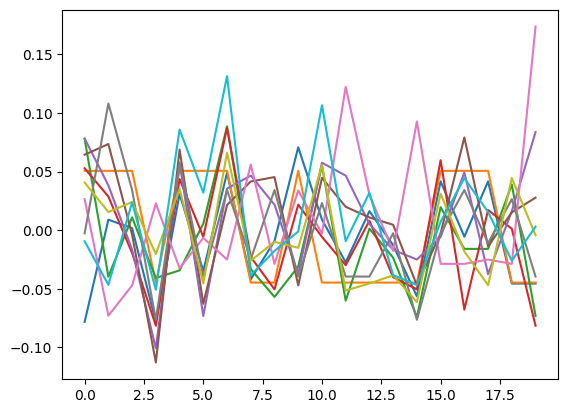

In [ ]:
# Make it possible to show plots in the notebooks.
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


def fit_linear_with_regularization(X, y, alpha):
  ''' Calculate w^* as given in answer 5c)'''
  X = np.c_[np.ones(X.shape[0]), X] #add intercept/bias to beginning of X
  I = np.eye(X.shape[1]) #unsure whether I[0,0] = 0 ? blir typ ingen skillnad
  
  w_opt = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y #
  print(w_opt)
  return w_opt 

def predict(X_test, w):
  """TODO"""
  return np.random.randn(X_test.shape[0]) # TODO: Change me

def plot_prediction(X_test, y_test, y_pred):
  """TODO"""
  # Scatter plot the first feature of X_test (x-axis) and y_test (y-axis)
  plt.plot(X_test) # TODO: Change me
  
  # TODO: Plot y_pred using the first feature of X_test as x-axis
  
  # TODO: Compute the mean squared error
  mean_squared_error = 0.
  return mean_squared_error

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Split the dataset into training and test set
num_test_elements = 20

X_train = X[:-num_test_elements]
X_test = X[-num_test_elements:]

y_train = y[:-num_test_elements]
y_test = y[-num_test_elements:]

# Set alpha
alpha = 0.01

# Train using linear regression with regularization and find optimal model
w = fit_linear_with_regularization(X_train, y_train, alpha)

# Make predictions using the testing set X_test
y_pred = predict(X_test, w)

# Plots and mean squared error
error = plot_prediction(X_test, y_test, y_pred)
print('Mean Squared error is ', error)

# Show the plot
plt.show()


# Bonus problem
Answering this question will not give you any additional points. Not answering this question will not prevent you from getting full points (if all other questions are answered correctly). However, if you answer this question, we will pick exactly one question where you didn't receive full points in this assignment and give you **at most** 4 more points there. In particular, between the questions for which you have reasonably attempted a solution, we will pick the one where the difference between the full point and the point you received is the maximum.

## Problem 5: Bayesian Linear Regression [up to 4 bonus points]

Proud of finishing the task using a linear model with regularization, you show your results to a representative of the Swedish Public Health Agency. You barely finish explaining your solution when the face of the representative turns red and you could distinctly hear: "Bayesian is the only way: How come didn't you use any probabilities?". 

You quickly head back to your desk and now assume a Gaussian prior on the solution $\mathbf{w}$, that is $p(\mathbf{w}) = \mathcal{N}(\mathbf{0}, \lambda^{-1} \mathbf{I})$ where $\lambda \in \mathbb{R}$ is a constant real number, $I$ is the $p \times p$ identity matrix and $\mathcal{N}(\mathbf{0}, \lambda^{-1} \mathbf{I})$ is used to mean the multivariate gaussian distribution with mean $\mathbf{0} \in \mathbb{R}^p$ , a vector of zeros of dimension $p$ and covariance matrix $\lambda^{-1} \mathbf{I}$ . Then, you use the following likelihood:

$$p(\mathbf{y} | \mathbf{X}, \mathbf{w}) = \prod_{i=1}^n \mathcal{N}(\mathbf{w}^T \mathbf{x}_i, \gamma^{-1})$$

where $\gamma \in \mathbb{R}$ is a constant real number and $\mathcal{N}(\mathbf{w}^T \mathbf{x}_i, \gamma^{-1})$ is the Gaussian distribution with mean  $\mathbf{w}^T \mathbf{x}_i$ and variance $\gamma^{-1}$.



### a) Derive log posterior [2 points]
Derive an expression for the log posterior $\ln p(\mathbf{w} | \mathbf{y}, \mathbf{X})$ in vector/matrix form as a function of $\mathbf{X}, \mathbf{y}, \mathbf{w}$. Show all derivations. You can ignore normalizing constants.



#### 📝 Your answer here:


### b) Equivalence of Bayesian and regularized regression [2 points]
Show that maximizing the posterior in a) is  similar to minimizing the function $\mathcal{L}(\mathbf{w})$ seen in the previous section. Show your derivations. (Note: You should show this without computing the maximum of the posterior. Instead, you should express the log posterior in term of $\mathcal{L}(\mathbf{w})$, ignoring constants if necessary. Then find the $\alpha$ of $\mathcal{L}(\mathbf{w})$ in term of $\lambda$ and $\gamma$).

#### 📝 Your answer here: